# Setting up necessary things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 1

In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
cd ..

C:\Users\Adnan\Desktop\Data Science\Final Capstone Project


# Preparing data

In [4]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [5]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/eye_dataloader_v{version}.pkl")

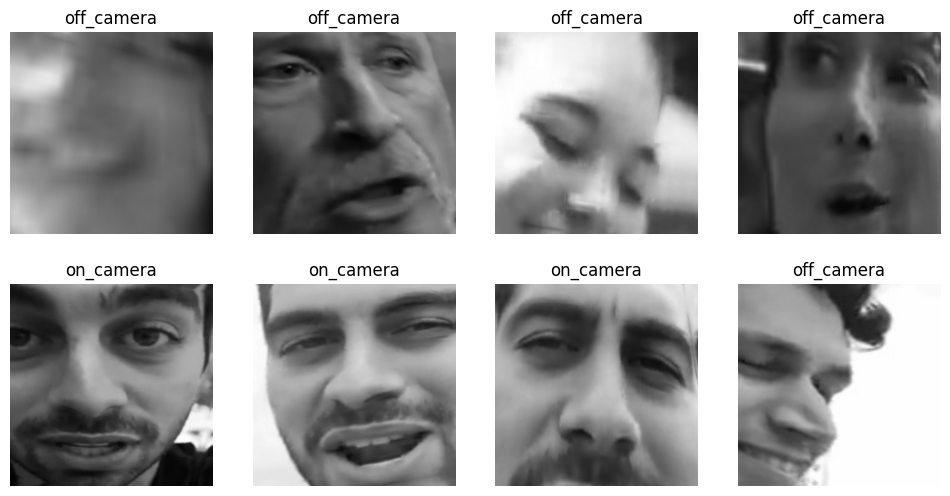

In [6]:
dls.train.show_batch(max_n=8, nrows=2)

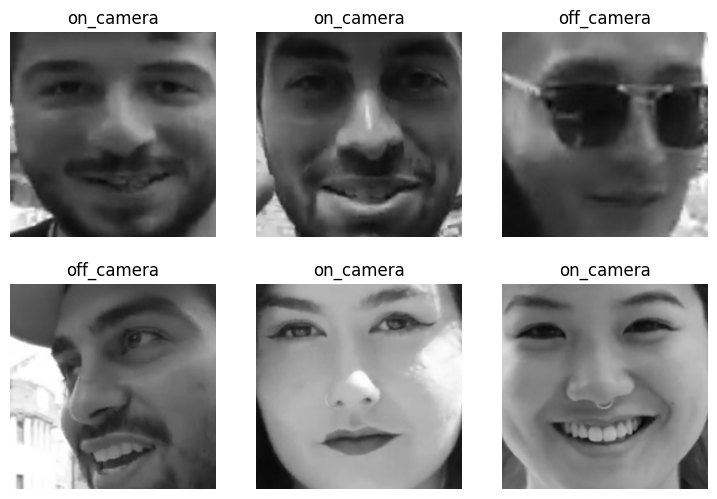

In [7]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training

In [8]:
model_path = "models"

In [9]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

C:\Users\Adnan\Desktop\Data Science\Final Capstone Project\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Adnan\Desktop\Data Science\Final Capstone Project\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Adnan/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [10]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.208396,0.947772,0.166667,0.833333,00:08


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.449846,0.794101,0.166667,0.833333,00:12
1,1.368363,0.622374,0.166667,0.833333,00:12
2,1.229189,0.550440,0.166667,0.833333,00:12
3,1.185441,0.533409,0.166667,0.833333,00:12
4,1.082824,0.496789,0.166667,0.833333,00:12


In [11]:
model.export(f"{model_path}/gaze-recognizer-v{version}.pkl")